In [ ]:
from airbnb_analysis_service import AirbnbAnalysisService
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

if __name__ == "__main__":

    # create service class
    airbnbAnalysis = AirbnbAnalysisService()

    # get all tables in form of a list
    listings = airbnbAnalysis.get_listings()

    print(f"listings {listings[0]}")

    # Schritt 1: Umwandeln in DataFrames
    listings_df = pd.DataFrame([l.__dict__ for l in listings])

## Objective 1 - Marktpotenzial und Standortanalyse
Im Rahmen dieses ersten Untersuchungsziels soll eine fundierte Analyse des Marktpotenzials sowie eine differenzierte Standortbewertung für Kurzzeitvermietung über Airbnb in der stadt Zürich erfolgen. Ziel ist es, für die InvestZurich AG belastbare Entscheidungsgrundlagen zu schaffen, um vielversprechende Investitionsgebiete zu identifizieren und zu priorisieren.

Zürich ist als internationale Wirtschaftsmetropole, Bildungsstandort und Tourismusziel von konstant hoher Nachfrage geprägt. Besonders im Bereich temporärer Unterkünfte - wie sie Airbnb bietet - ergeben sich daraus regelmässig neue Marktchance, aber auch dynamische Herausforderungen. Für eine Immobilien-Investmentstrategie in diesem Segment sind sowohl mikrogeografische Unterschiede zwischen Quartieren als auch spezifische Angebots- und Nachfragestrukturen zentral.

Daher verfolgt dieses Kapitel die Frage, wo innerhalb Zürich das grösste Potenzial für Airbnb-Investitionen liegt - unter Berücksichtigung von Preisniveau, Nachfrageintensität und Angebotsstrktur je Kreis. Zusätzlich wird untersucht, welche Wohnungstypen (z.B. Anzahl Zimmer, Wohnungsgrösse) besonders gefragt oder unterversorgt sind, um daraus konkrete Handlungsempfehlungen für die künftige Immobilienauswahl ableiten zu können.

Zur Beantwortung dieser fragestellungen werden verschiedene Datenquellen herangezogen, explorative Visualisierungen erstellt und relevante statistische Kennzahlen berechnet.

### Anzahl Listings pro Kreis
Ein zentraler Ausgangspunkt zur Analyse des Marktpotenzials im Zürcher Airbnb-Markt ist die Betrachtung der derzeitigen Angebotsverteilung über die verschiedenen Stadtkreise hinweg. Die folgende Visualisierung zeigt die absolute Anzahl an Airbnb-Angeboten („Listings“) pro Kreis. Dadurch lassen sich erste Aussagen über die Marktaktivität und mögliche Sättigung oder Unterversorgung einzelner Stadtteile treffen.

Die nachfolgende Darstellung zeigt die Anzahl Listing pro Kreis:

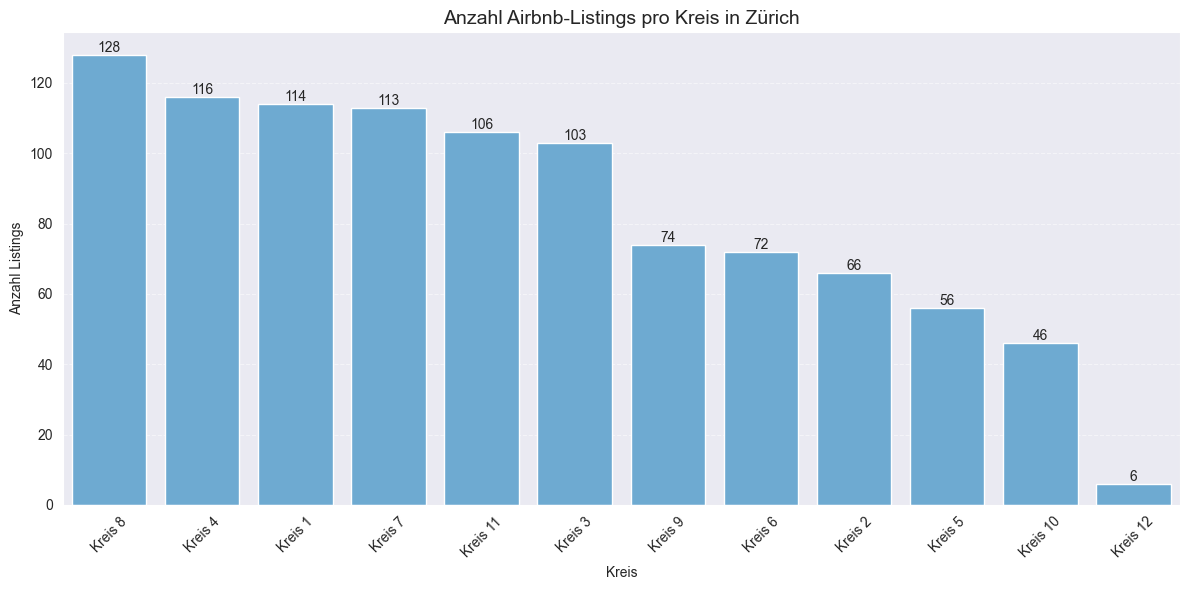

In [2]:
# Gruppierung – Anzahl Listings pro Stadtteilgruppe
kreis_counts = listings_df["neighbourhood_group_cleansed"].value_counts().reset_index()
kreis_counts.columns = ["neighbourhood_group_cleansed", "count"]
kreis_counts_sorted = kreis_counts.sort_values(by="count", ascending=False)

# Plot
plt.figure(figsize=(12,6))
bar_color = "#5DADE2"
barplot = sns.barplot(
    data=kreis_counts_sorted,
    x="neighbourhood_group_cleansed",
    y="count",
    color=bar_color
)

# Zahlen über den Balken anzeigen
for bar in barplot.patches:
    height = bar.get_height()
    barplot.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{int(height)}',
        ha='center',
        va='bottom'
    )

# Achsentitel und Design
plt.title("Anzahl Airbnb-Listings pro Kreis in Zürich", fontsize=14)
plt.xlabel("Kreis")
plt.ylabel("Anzahl Listings")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Wie aus der Visualisierung deutlich hervorgeht, konzentriert sich das Angebot derzeit stark auf bestimmte Stadtteile. Besonders Kreis 11 sticht mit 72 aktiven Listings hervor, gefolgt von Kreis 4 und Kreis 8 (jeweils 63) sowie Kreis 7 (60). Diese Kreise zeichnen sich offenbar durch eine bereits hohe Marktdurchdringung im Bereich Kurzzeitvermietung aus.

Demgegenüber zeigen Kreis 10 (25 Listings), Kreis 5 (22 Listings) und insbesondere Kreis 12 (nur 3 Listings) eine deutlich geringere Präsenz auf Airbnb. Diese niedrigeren Zahlen können verschieden interpretiert werden: Einerseits könnten sie auf geringere Nachfrage oder restriktivere Regulierungen hindeuten. Andererseits besteht hier möglicherweise ein bislang unerschlossenes Marktpotenzial, das gezielt erschlossen werden könnte – etwa durch gezielte Investitionen in passende Wohnungstypen und differenzierte Angebotsstrategien.

- Hohe Listings-Zahlen (z.B. Kreise 4, 8, 11): Diese Quartiere sind vermutlich stark frequentiert und bieten bereits funktionierende Geschäftsmodelle. Für Investoren könnten diese Bezirke trotz möglicher Konkurrenz weiterhin attraktiv sein – sofern Nachfrage, Auslastung und Preisniveau entsprechend hoch sind.

- Niedrige Listings-Zahlen (z.B. Kreise 5, 10, 12): Diese Bereiche könnten neue Chancen eröffnen, insbesondere wenn dort eine latente Nachfrage besteht, die bislang nicht durch Airbnb-Angebote gedeckt wurde. Eine tiefere Analyse von Besucherströmen, Infrastruktur und lokalen Gegebenheiten ist hier entscheidend.

### Durchschnittlicher Preis pro Nacht und Kreis
Im zweiten Schritt der Standortanalyse richtet sich der Fokus auf die durchschnittlichen Übernachtungspreise pro Airbnb-Listing, differenziert nach Keisen in Zürich. Diese Kennzahl ist von zentraler Bedeutung für die Bewertung der potenziellen Ertragskraft eines Investments: Je höher der durchschnittliche Preis pro Nacht, desto grösser ist – bei vergleichbarer Auslastung – das Umsatzpotenzial einer Unterkunft.

Die nachfolgende Visualisierung zeigt die durchschnittlichen Preise pro Nacht (in CHF) für jedes Zürcher Stadtquartier:


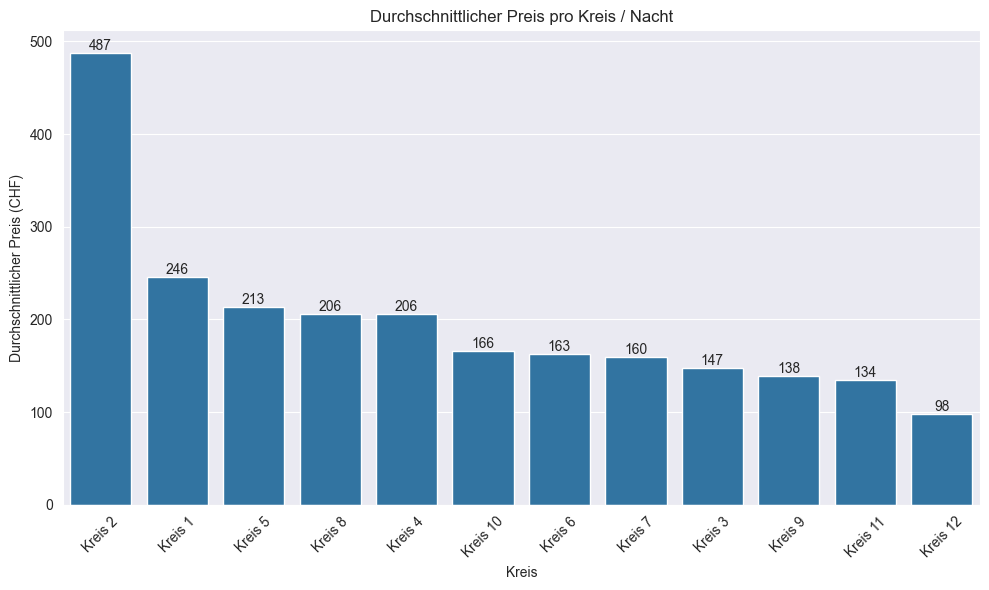

Durchschnittlicher Preis aller Airbnb-Angebote: 195.98 CHF


In [3]:
listings_df = listings_df[
    (listings_df['price'] > 0) &
    (listings_df['availability_365'] > 0) &
    (listings_df['neighbourhood'].notnull())
]

# Gruppieren nach neighbourhood_group_cleansed
group_stats = listings_df.groupby("neighbourhood_group_cleansed").agg({
    "price": "mean"
}).reset_index()

# Sortieren nach Preis
group_stats_sorted = group_stats.sort_values(by="price", ascending=False)

# Visualisierung
plt.figure(figsize=(10,6))
ax = sns.barplot(data=group_stats_sorted, x="neighbourhood_group_cleansed", y="price")
plt.xticks(rotation=45)
plt.title("Durchschnittlicher Preis pro Kreis / Nacht")
plt.ylabel("Durchschnittlicher Preis (CHF)")
plt.xlabel("Kreis")

# Durchschnittspreise oberhalb der Balken anzeigen
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:.0f}',
        ha='center',
        va='bottom'
    )

plt.tight_layout()
plt.show()

durchschnittspreis = listings_df["price"].mean()
print(f"Durchschnittlicher Preis aller Airbnb-Angebote: {durchschnittspreis:.2f} CHF")

Der auffälligste Ausreisser ist klar Kreis 2, mit einem durchschnittlichen Preis von 487 CHF pro Nacht. Dieser Wert liegt deutlich über dem Marktdurchschnitt von 195 CHF und hebt sich stark von allen anderen Kreisen ab. Kreis 2 liegt direkt am Zürichsee und umfasst prestigeträchtige Wohnlagen wie Enge und Wollishofen – Stadtteile, die bei Touristen durch Seelage, Ruhe und Exklusivität besonders gefragt sind. Für Investoren bietet dieser Kreis somit ein überdurchschnittlich hohes Preisniveau, das allerdings mit entsprechend hohen Immobilienpreisen und regulatorischen Hürden einhergehen dürfte.

Es folgen Kreis 1 (246 CHF) – das historische und touristische Zentrum der Stadt – sowie Kreis 5 (213 CHF), das trendige ehemalige Industriequartier mit hoher kultureller Dichte und urbanem Flair. Auch Kreis 8 und 4 (je 206 CHF) zeigen attraktive durchschnittliche Übernachtungspreise.

Der Grossteil der übrigen Kreise bewegt sich im Bereich zwischen 130 und 170 CHF pro Nacht. Den niedrigsten Durchschnittspreis verzeichnet Kreis 12 mit 98 CHF, was auf eine geringere touristische Attraktivität oder geringere Zahlungsbereitschaft hinweist.

**Fazit und strategische Überlegungen:**
- Premium-Strategie: Investitionen in Kreise mit hohen durchschnittlichen Preisen (v.a. 2, 1, 5, 4, 8) versprechen potenziell hohe Umsätze pro Nacht. Diese Strategie setzt jedoch meist höhere Einstiegskosten, intensivere Konkurrenz und gegebenenfalls strengere Auflagen voraus.
- Wachstumsstrategie: In Kreisen mit bislang niedrigem Angebot und moderaten Preisen (z.B. 10, 12) könnten gezielte Investitionen lohnenswert sein – insbesondere, wenn dort Nachfragepotenziale bestehen, die bislang nicht durch Airbnb-Angebote gedeckt sind.
- Mischstrategie: Eine Kombination aus hochpreisigen Lagen mit etabliertem Marktumfeld und aufstrebenden, preisgünstigen Quartieren könnte für InvestZurich AG ein ausgewogenes Risiko-Ertrags-Profil darstellen.

In Kombination mit der zuvor analysierten Angebotsdichte ergibt sich ein differenziertes Bild: Ein hoher Preis bedeutet nicht zwangsläufig geringe Konkurrenz, ebenso ist ein niedriges Preisniveau nicht automatisch ein Ausschlusskriterium für Investitionen.

### Durchschnittliche Verfügbarkeit der Airbnb-Listings
Nach der Analyse von Angebotsdichte und durchschnittlichem Übernachtungspreis liefert ein weiterer wichtiger Indikator zusätzliche Einblicke in die Marktdynamik: die Verfügbarkeit von Airbnb-Angeboten pro Jahr und pro Stadtkreis.

Im dritten Analyseschritt betrachten wir die durchschnittliche Verfügbarkeit von Airbnb-Angeboten in den einzelnen Zürcher Stadtkreisen – gemessen an der Variable availability_365. Diese beschreibt, an wie vielen Tagen im Jahr ein Airbnb theoretisch verfügbar ist. Eine niedrige Verfügbarkeit kann darauf hinweisen, dass ein Objekt häufig gebucht und damit stark nachgefragt ist – also eine hohe Auslastung aufweist. Die nachfolgende Abbildung zeigt, an wie vielen Tagen die Airbnb's durchschnittlich pro Kreis innerhalb der nächsten 365 Tagen noch buchbar sind.

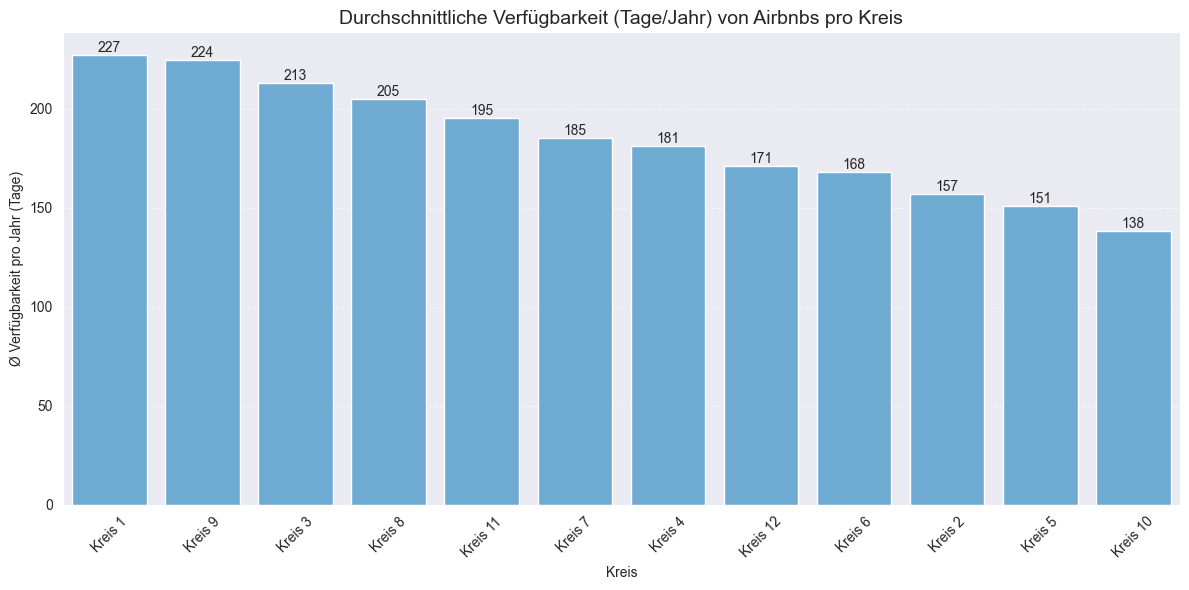

In [4]:
# Daten bereinigen und aggregieren
availability_stats = listings_df.groupby("neighbourhood_group_cleansed").agg({
    "availability_365": "mean"
}).reset_index()

# Sortieren nach Verfügbarkeit
availability_stats_sorted = availability_stats.sort_values(by="availability_365", ascending=False)

# Plot erstellen
plt.figure(figsize=(12,6))
bar_color = "#5DADE2"
barplot = sns.barplot(
    data=availability_stats_sorted,
    x="neighbourhood_group_cleansed",
    y="availability_365",
    color=bar_color
)

# Werte über den Balken anzeigen
for bar in barplot.patches:
    height = bar.get_height()
    barplot.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:.0f}',  # ganze Tage ohne Nachkommastellen
        ha='center',
        va='bottom'
    )

# Titel, Achsen und Layout
plt.title("Durchschnittliche Verfügbarkeit (Tage/Jahr) von Airbnbs pro Kreis", fontsize=14)
plt.xlabel("Kreis")
plt.ylabel("Ø Verfügbarkeit pro Jahr (Tage)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


**Interpretation der Verfügbarkeiten:**
Die geringsten durchschnittlichen Verfügbarkeiten zeigen sich in:
- Kreis 10 (138 Tage)
- Kreis 5 (151 Tage)
- Kreis 2 (157 Tage)
Diese Zahlen legen nahe, dass die dort gelisteten Unterkünfte besonders häufig gebucht sind – ein klares Zeichen für eine hohe Marktnachfrage und attraktive Standorte für Investitionen. Solche Kreise sind aus Investorensicht spannend, da sie auf eine gute Auslastung und stabile Einnahmen hindeuten.

Umgekehrt haben Kreise mit hoher Verfügbarkeit wie:
- Kreis 1 (227 Tage)
- Kreis 9 (224 Tage)
- Kreis 3 (213 Tage)
eher ein Überangebot oder eine geringere Buchungsfrequenz. Hier könnten Unterkünfte teilweise leer stehen oder noch nicht optimal ausgelastet sein – potenziell ein Zeichen für ein schwächeres Nachfrageprofil.
-
Es ist allerdings zu beachten, dass niedrige Verfügbarkeiten auch durch Kalendersperrungen durch Gastgeber oder gesetzliche Einschränkungen verursacht werden können. Dennoch: In der Regel gilt eine niedrige Verfügbarkeit als positives Marktzeichen, sofern sie auf eine tatsächliche Gästebuchung zurückzuführen ist.

**Verbindung zu bisherigen Erkenntnissen:**
- Kreis 2 ist besonders interessant: Er kombiniert sehr hohe Preise (487 CHF/Nacht) mit vergleichsweise geringer Verfügbarkeit – ein Indiz für lukrative, stark nachgefragte Premium-Listings.
- Kreis 10, obwohl mit moderaten Preisen und geringer Angebotsdichte, weist die geringste Verfügbarkeit auf. Dies könnte auf eine hohe Nachfrage bei gleichzeitig geringem Wettbewerb hinweisen – ein vielversprechender Nischenmarkt.

### Einfluss des Unterkunftstyps auf die Verfügbarkeit
Nachdem wir die Angebotsdichte, Preisstruktur und durchschnittliche Verfügbarkeit pro Stadtkreis betrachtet haben, widmet sich dieser Abschnitt der Frage, ob auch der Unterkunftstyp einen Einfluss auf die Beliebtheit und Auslastung eines Airbnb-Angebots hat. Dafür wurde erneut die Variable availability_365 verwendet und mittels Boxplot-Visualisierung nach Unterkunftstyp aufgeschlüsselt. Die nachfolgende Visualisierung zeigt die Verteilungsstruktur der jährlichen Verfügbarkeit für die drei  Unterkunftsarten, Private Room, Entire Home/Apt und Hotel Room auf Airbnb in Zürich.

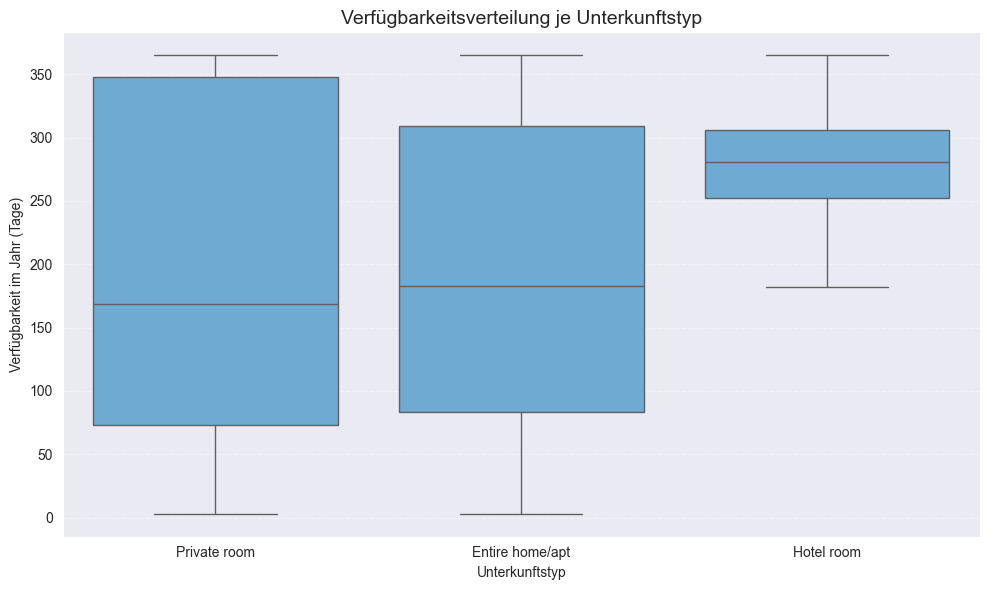

In [5]:
# Datenvorbereitung
df = listings_df[
    (listings_df["availability_365"].notnull()) &
    (listings_df["room_type"].notnull())
]

# Extreme Verfügbarkeiten beschränken (nur bis 365 Tage erlaubt)
df = df[df["availability_365"] <= 365]

# Boxplot erstellen
plt.figure(figsize=(10,6))
box_color = "#5DADE2"
sns.boxplot(
    data=df,
    x="room_type",
    y="availability_365",
    color=box_color,
    showfliers=True
)

# Layout
plt.title("Verfügbarkeitsverteilung je Unterkunftstyp", fontsize=14)
plt.xlabel("Unterkunftstyp")
plt.ylabel("Verfügbarkeit im Jahr (Tage)")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


**Einige zentrale Beobachtungen::**
- Private Rooms zeigen eine sehr breite Streuung, mit Verfügbarkeiten zwischen nahezu 0 und 365 Tagen. Der Median liegt jedoch relativ tief, was darauf hindeutet, dass diese Objekte häufig gebucht oder blockiert sind – ein möglicher Hinweis auf hohe Nachfrage.
- Entire Homes/Apartments weisen ebenfalls eine grosse Spannbreite auf, mit einem Median leicht oberhalb der Private Rooms. Dies lässt vermuten, dass sie etwas seltener gebucht oder bewusster dosiert verfügbar gemacht werden – etwa durch Gastgeber, die sie auch selbst nutzen.
- Hotel Rooms zeigen eine deutlich engere Verteilung mit einem höheren Median und vergleichsweise hoher konstanter Verfügbarkeit (oft über 250 Tage). Dies spiegelt die professionell betriebene Natur dieser Angebote wider, welche meist permanent buchbar und weniger von privaten Nutzungszyklen abhängig sind. Gleichzeitig kann die hohe Verfügbarkeit aber auch auf niedrigere Auslastung hindeuten, wenn der Markt gesättigt ist oder Nachfrage fehlt.

In dieser Darstellung ist der Unterkunftstyp „Private Room“ tendenziell am wenigsten verfügbar, was als Indikator für hohe Nachfrage interpretiert werden kann – entweder durch eine Vielzahl an Buchungen oder durch punktuell aktivierte Verfügbarkeit. Investitionen in dieses Segment könnten sich für Anbieter mit begrenzten Immobilienressourcen (z.B. einzelne Zimmer in bewohnten Wohnungen) lohnen.

### Verfügbarkeit in Abhängigkeit von der Unterkunftskapazität
Ein weiterer entscheidender Faktor bei der Bewertung des Marktpotenzials von Airbnb-Angeboten ist die Grösse bzw. Gästekapazität der Unterkunft – gemessen an der maximalen Anzahl von Personen, die eine Unterkunft gleichzeitig beherbergen kann (accommodates). Das folgende Balkendiagramm untersucht, wie sich die durchschnittliche jährliche Verfügbarkeit in Abhängigkeit dieser Kapazität verändert.

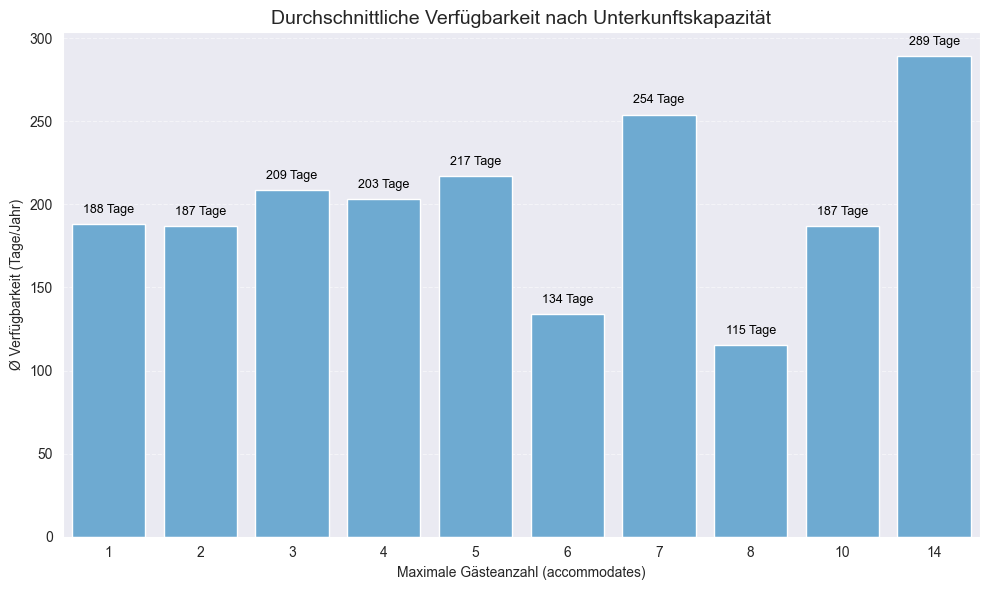

In [23]:
# Daten vorbereiten
df = listings_df[
    (listings_df["accommodates"].notnull()) &
    (listings_df["availability_365"].notnull()) &
    (listings_df["accommodates"] > 0)
]

# Aggregation und Sortierung nach Verfügbarkeit (absteigend)
availability_stats = df.groupby("accommodates")["availability_365"].mean().reset_index()
availability_stats_sorted = availability_stats.sort_values(by="availability_365", ascending=False)

# Balkendiagramm
plt.figure(figsize=(10,6))
barplot = sns.barplot(
    data=availability_stats_sorted,
    x="accommodates",
    y="availability_365",
    color="#5DADE2"
)

# Balkenbeschriftung
for index, row in availability_stats_sorted.iterrows():
    barplot.text(
        x=index,
        y=row["availability_365"] + 5,
        s=f"{row['availability_365']:.0f} Tage",
        ha='center',
        va='bottom',
        fontsize=9,
        color='black'
    )

# Layout
plt.title("Durchschnittliche Verfügbarkeit nach Unterkunftskapazität", fontsize=14)
plt.xlabel("Maximale Gästeanzahl (accommodates)")
plt.ylabel("Ø Verfügbarkeit (Tage/Jahr)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


**Interpretation der Visualisierung:**

Die Balkengrafik zeigt auf den ersten Blick ein nicht-lineares Muster:
- Listings mit einer Kapazität von 8 Personen (115 Tage) und 6 Personen (134 Tage) sind im Durchschnitt am wenigsten verfügbar – was auf eine sehr hohe Nachfrage und häufige Buchungen schliessen lässt.
- Ebenfalls vergleichsweise niedrige Verfügbarkeiten zeigen sich bei Unterkünften für 1–2 Gäste (ca. 187–188 Tage), was auf konstant gute Auslastung bei kleinen Einheiten hindeutet.
- Deutlich höhere Verfügbarkeiten zeigen sich hingegen bei Kapazitäten von 7 Gästen (254 Tage) und vor allem bei sehr grossen Unterkünften mit 14 Gästen (289 Tage) – hier scheint die Nachfrage (relativ zur Angebotskapazität) geringer oder die Zielgruppe eingeschränkt zu sein.
- Mittelgrosse Kapazitäten (z.B. 3–5 Gäste) weisen eine ausgeglichene Verfügbarkeit im Bereich von 200–217 Tagen auf – ein Zeichen für solide, aber nicht überdurchschnittliche Nachfrage.

Die Daten deuten darauf hin, dass vor allem Unterkünfte mit mittlerer bis hoher Kapazität (6–8 Gäste) besonders stark nachgefragt werden – wie anhand ihrer niedrigen durchschnittlichen Verfügbarkeit ersichtlich ist. Dies könnte daran liegen, dass diese Objekte ideal für Familien, kleine Gruppen oder Geschäftsreiseteams sind – also Zielgruppen mit überdurchschnittlicher Buchungshäufigkeit

Für die InvestZurich AG ergeben sich aus der Analyse der Unterkunftskapazitäten konkrete strategische Implikationen. Besonders attraktiv erscheinen Investitionen in Immobilien mit einer Kapazität für 6 bis 8 Personen, da diese Einheiten im Durchschnitt am häufigsten gebucht werden und somit eine besonders hohe Auslastung aufweisen. Auch kleinere Objekte für 1 bis 2 Gäste bleiben relevant, da sie eine solide Nachfrage zeigen und im Markt weit verbreitet sind – sie bieten insbesondere für Alleinreisende oder Paare eine geeignete Unterkunftsform. Mit Vorsicht zu bewerten sind hingegen sehr grosse Unterkünfte, etwa mit einer Kapazität für 14 Personen. Obwohl diese Angebote am Markt verfügbar sind, deutet ihre vergleichsweise hohe Verfügbarkeit darauf hin, dass sie seltener gebucht werden und somit ein erhöhtes Auslastungsrisiko bergen.

### Klassifikation von Top Performern mittels Random Forest
Um potenziell erfolgreiche Airbnb-Angebote systematisch identifizieren zu können, wurde ein Klassifikationsmodell auf Basis eines Random Forest Algorithmus entwickelt. Ziel war es, sogenannte Top Performer zu erkennen – also Angebote, die sowohl hinsichtlich ihres Preises als auch ihrer Anzahl an Bewertungen über dem Median liegen. Diese Kombination wurde als Indikator für wirtschaftlich erfolgreiche und gleichzeitig nachgefragte Angebote interpretiert.

Die Modellierung erfolgte in mehreren Schritten. Zunächst wurde das zugrunde liegende Datenset bereinigt und nur solche Einträge berücksichtigt, die vollständige Informationen zu Preis, Raumanzahl, Badezimmern, Unterkunftskapazität, Unterkunftstyp und Lage enthielten. Anschliessend wurde die Zielvariable top_performer binär kodiert: Ein Listing erhielt den Wert 1, wenn sowohl Preis als auch Anzahl der Bewertungen über dem jeweiligen Median lagen; andernfalls wurde es mit 0 klassifiziert.

Als erklärende Merkmale wurden fünf Variablen ausgewählt: accommodates, bedrooms, bathrooms, room_type sowie neighbourhood_group_cleansed. Kategorische Variablen wurden mittels Label-Encoding numerisch transformiert, bevor das Modell mit einem RandomForestClassifier (100 Bäume) trainiert wurde. Die Daten wurden im Verhältnis 70% zu 30% in Trainings- und Testdaten aufgeteilt.


              precision    recall  f1-score   support

           0       0.90      0.91      0.91       126
           1       0.61      0.57      0.59        30

    accuracy                           0.85       156
   macro avg       0.75      0.74      0.75       156
weighted avg       0.84      0.85      0.84       156



C:\Users\basil\AppData\Local\Temp\ipykernel_6300\427257067.py:66: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\BINA\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


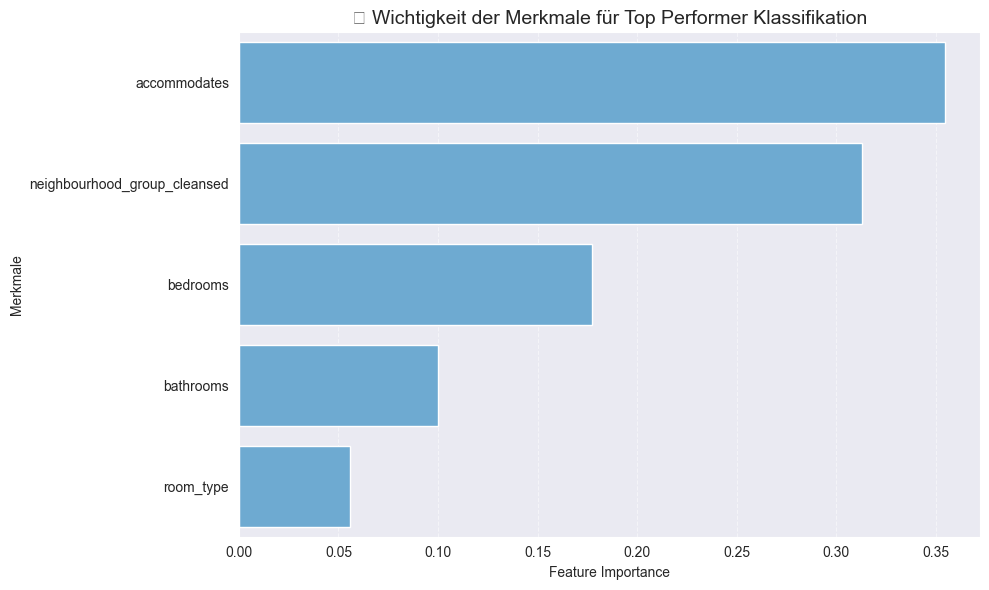

C:\Users\basil\AppData\Local\Temp\ipykernel_6300\427257067.py:75: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  plt.tight_layout()
C:\BINA\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


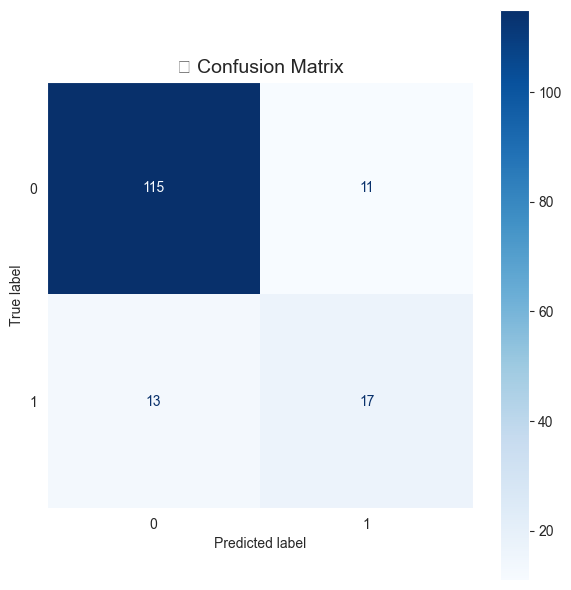

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Daten vorbereiten
df = listings_df.copy()

# Filter und Bereinigung
df = df[
    (df["price"] > 0) & (df["price"] < 1000) &
    (df["number_of_reviews"].notnull()) &
    (df["bedrooms"].notnull()) &
    (df["bathrooms"].notnull()) &
    (df["accommodates"].notnull()) &
    (df["room_type"].notnull()) &
    (df["neighbourhood_group_cleansed"].notnull())
]

# Zielvariable konstruieren (Top Performer = Preis und Reviews über Median)
df["top_performer"] = (
    (df["price"] > df["price"].median()) &
    (df["number_of_reviews"] > df["number_of_reviews"].median())
).astype(int)

# Feature-Auswahl
features = [
    "accommodates", "bedrooms", "bathrooms",
    "room_type", "neighbourhood_group_cleansed"
]

X = df[features].copy()
y = df["top_performer"]

# Kategorische Variablen encodieren
le_room = LabelEncoder()
le_neigh = LabelEncoder()
X["room_type"] = le_room.fit_transform(X["room_type"])
X["neighbourhood_group_cleansed"] = le_neigh.fit_transform(X["neighbourhood_group_cleansed"])

# Train/Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modell trainieren
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Feature Importance visualisieren
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
barplot = sns.barplot(
    x=importances.values,
    y=importances.index,
    color="#5DADE2"
)

plt.title("Fature Importance")
plt.ylabel("Merkmale")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Confusion Matrix
fig, ax = plt.subplots(figsize=(6,6))
disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax=ax, cmap="Blues")

ax.set_title("Confusion Matrix", fontsize=14)
plt.grid(False)
plt.tight_layout()
plt.show()

Das Modell erzielte auf dem Testdatensatz eine Gesamtgenauigkeit von 85%. Der F1-Score für die Klasse der Top Performer (1) lag bei 0.59, während die Klasse der Nicht-Performer (0) einen deutlich höheren F1-Score von 0.91 erreichte. Diese Differenz verdeutlicht, dass das Modell besonders gut darin ist, weniger erfolgreiche Angebote zu erkennen, während die Identifikation von Top Performern anspruchsvoller bleibt. Die Confusion Matrix zeigt, dass 17 der 30 tatsächlichen Top Performer korrekt vorhergesagt wurden, während 13 nicht erkannt wurden. Gleichzeitig wurden 11 Objekte fälschlicherweise als Top Performer klassifiziert.

Besonders aufschlussreich ist die Analyse der Merkmalswichtigkeit im Modell: Das wichtigste Kriterium für die Klassifikation war die Unterkunftskapazität (accommodates), gefolgt von der Lage (neighbourhood_group_cleansed) und der Anzahl der Schlafzimmer. Geringere Bedeutung hatten dagegen die Anzahl der Badezimmer sowie der Unterkunftstyp.

Diese Ergebnisse bestätigen die vorherigen Analysen der Nachfrageverteilung: Erfolgreiche Airbnb-Angebote sind häufig in der Lage, mehrere Gäste zu beherbergen und befinden sich in bestimmten, gefragten Stadtteilen. Das Random Forest Modell bietet somit eine fundierte Grundlage, um Investitionsentscheidungen datenbasiert zu unterstützen. Es kann als ergänzendes Werkzeug dienen, um Immobilienangebote frühzeitig auf ihr Potenzial zur erfolgreichen Kurzzeitvermietung hin zu prüfen. Weiteres Optimierungspotenzial besteht durch die Integration zusätzlicher Einflussfaktoren wie z.B. Ausstattung, Bewertungsscores oder saisonale Schwankungen.

### Zusammenfassung und Handlungsempfehlungen Objective 1
Im Rahmen dieser datenbasierten Standort- und Potenzialanalyse für den Airbnb-Markt in der Stadt Zürich wurden verschiedene Perspektiven berücksichtigt: die Verteilung und Anzahl der Angebote pro Stadtkreis, Preisniveaus, Auslastung bzw. Verfügbarkeit, Unterkunftstypen, Gästekapazitäten sowie die Klassifikation besonders erfolgreicher Inserate mittels eines Random-Forest-Modells.

Die Ergebnisse zeigen deutlich, dass sich das Investitionspotenzial nicht pauschal auf einzelne Stadtteile oder Unterkunftstypen reduzieren lässt. Vielmehr entsteht ein differenziertes Bild, bei dem mehrere Faktoren zusammenwirken. Auf Basis der durchgeführten Analysen lassen sich für die InvestZurich AG folgende zentrale Handlungsempfehlungen ableiten:

**1. Standortwahl: Hohe Nachfrage gezielt nutzen**

Kreise mit niedriger durchschnittlicher Verfügbarkeit, wie z.B. Kreis 10, Kreis 5 und Kreis 2, weisen auf eine hohe Buchungsauslastung hin. Besonders Kreis 2 fällt zudem durch ein sehr hohes Preisniveau auf, was auf ein überdurchschnittlich hohes Umsatzpotenzial hindeutet. Gleichzeitig ist hier das Angebot vergleichsweise gering, was auf eine attraktive Marktlücke hinweisen kann. Investitionen sollten gezielt auf Stadtteile ausgerichtet werden, die hohe Nachfrage mit überschaubarem Wettbewerb kombinieren.

**2. Unterkunftsgrösse und Kapazität strategisch wählen**

Die Analyse der Unterkunftskapazität zeigt, dass insbesondere Objekte mit Platz für 6 bis 8 Personen stark nachgefragt sind. Diese Einheiten weisen eine signifikant niedrigere Verfügbarkeit auf und lassen auf eine hohe Beliebtheit schliessen. Gleichzeitig ermöglichen sie durch höhere Preise pro Nacht ein attraktives Umsatzpotenzial. Auch kleinere Einheiten für 1 bis 2 Gäste bleiben relevant, da sie eine solide Auslastung erzielen und ein breites Zielpublikum ansprechen.

**3. Geeignete Unterkunftstypen priorisieren**

Im Vergleich der Unterkunftstypen zeigt sich, dass „Private Rooms“ und „Entire Homes/Apartments“ häufiger gebucht werden als z.B. Hotelzimmer, was durch geringere durchschnittliche Verfügbarkeiten belegt wird. Für eine skalierbare Investmentstrategie bieten sich insbesondere ganze Wohnungen an, da sie mehr Flexibilität in Preisgestaltung, Ausstattung und Zielgruppenansprache ermöglichen.

**4. Datenbasiertes Auswahlverfahren etablieren**

Das entwickelte Random-Forest-Modell zur Klassifikation von Top Performern ermöglicht eine erste Einschätzung, ob ein Angebot Potenzial für hohe Nachfrage und Ertrag aufweist. Die wichtigsten Einflussfaktoren im Modell waren dabei die Kapazität, Lage und Anzahl der Schlafzimmer. Dieses Modell kann als unterstützendes Tool genutzt werden, um neue Angebote im Markt vorab zu bewerten und Investitionsrisiken zu minimieren.

### Fazit
Für die InvestZurich AG ergibt sich ein klares Bild: Erfolgreiche Airbnb-Investitionen in Zürich sind vor allem in gut gelegenen Stadtteilen mit hoher Nachfrage, mittlerer bis grösserer Unterkunftskapazität und flexibler Raumaufteilung zu finden. Durch die Kombination aus quantitativer Marktanalyse, Visualisierung und maschinellem Lernmodell wurde ein datengetriebenes Fundament geschaffen, auf dem strategische Entscheidungen für zukünftige Investitionen im Kurzzeitvermietungsmarkt fundiert getroffen werden können.